In [3]:
# Dependencies and Setup
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
# import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

In [ ]:
city_info = []
counter = 1
key = '609be8a6d956535ec2b42768676a33c3'   
for city in cities:
    url = 'http://api.openweathermap.org/data/2.5/weather?q={}&appid=609be8a6d956535ec2b42768676a33c3&units=imperial'.format(city)
    resp = requests.get(url).json()
    city_info.append(resp) 
    print('Processing City #',counter, "of", str(len(cities)), ' || ', city)
    counter = counter + 1
    

Processing City # 1 of 606  ||  ushuaia
Processing City # 2 of 606  ||  punta arenas
Processing City # 3 of 606  ||  elmadag
Processing City # 4 of 606  ||  sungairaya
Processing City # 5 of 606  ||  hay river
Processing City # 6 of 606  ||  illoqqortoormiut
Processing City # 7 of 606  ||  busselton
Processing City # 8 of 606  ||  arraial do cabo
Processing City # 9 of 606  ||  havoysund
Processing City # 10 of 606  ||  dingle
Processing City # 11 of 606  ||  albany
Processing City # 12 of 606  ||  japura
Processing City # 13 of 606  ||  moron de la frontera
Processing City # 14 of 606  ||  cotonou
Processing City # 15 of 606  ||  cape town
Processing City # 16 of 606  ||  panzhihua
Processing City # 17 of 606  ||  margate
Processing City # 18 of 606  ||  hilo
Processing City # 19 of 606  ||  hermanus
Processing City # 20 of 606  ||  lyndon
Processing City # 21 of 606  ||  zhireken
Processing City # 22 of 606  ||  puerto ayora
Processing City # 23 of 606  ||  road town
Processing City 

Processing City # 191 of 606  ||  portland
Processing City # 192 of 606  ||  laguna
Processing City # 193 of 606  ||  muros
Processing City # 194 of 606  ||  vila velha
Processing City # 195 of 606  ||  namatanai
Processing City # 196 of 606  ||  srednekolymsk
Processing City # 197 of 606  ||  lososina
Processing City # 198 of 606  ||  chenzhou
Processing City # 199 of 606  ||  florianopolis
Processing City # 200 of 606  ||  millinocket
Processing City # 201 of 606  ||  madimba
Processing City # 202 of 606  ||  neya
Processing City # 203 of 606  ||  tasiilaq
Processing City # 204 of 606  ||  lorengau
Processing City # 205 of 606  ||  polunochnoye
Processing City # 206 of 606  ||  jinja
Processing City # 207 of 606  ||  lebu
Processing City # 208 of 606  ||  miri
Processing City # 209 of 606  ||  port lincoln
Processing City # 210 of 606  ||  hundorp
Processing City # 211 of 606  ||  mnogovershinnyy
Processing City # 212 of 606  ||  phan thiet
Processing City # 213 of 606  ||  la romana

In [14]:
df = pd.DataFrame(city_info)

#SAVE INFO INTO CSV - RAW DATA
df.to_csv('raw_data.csv', index=False)

In [15]:
#Latitude
def lat(row):
    if type(row)==dict:
        lat = [(row.get('lat'))]
        return lat[0]
    else:
        return    
df['Latitude'] = df['coord'].map(lat)

In [16]:
#Temperature
def temp(row):
    if type(row)==dict:
        temp = [(row.get('temp_max'))]
        return temp[0]
    else:
        return   
df['Max_Temp'] = df['main'].map(temp)

In [17]:
#Humidity
def humidity(row):
    if type(row)==dict:
        hum = [(row.get('humidity'))]
        return hum[0]
    else:
        return  
df['Humidity'] = df['main'].map(humidity)

In [18]:
#Cloudiness
def cloudiness(row):
    if type(row)==dict:
        cloud = [(row.get('all'))]
        return cloud[0]
    else:
        return 
df['Cloudiness'] = df['clouds'].map(cloudiness)

In [19]:
#Wind Speed
def windiness(row):
    if type(row)==dict:
        wind = [(row.get('speed'))]
        return wind[0]
    else:
        return  
df['Wind_Speed'] = df['wind'].map(windiness)

In [20]:
df = df[['name','Latitude', 'Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']]
df = df.rename(columns={'name': 'City'})
df.head()

#SAVE (UPDATED) INFO INTO CSV - SPECIFIC DATA
df.to_csv('updated_data.csv', index=False)

In [21]:
date = datetime.datetime.today().strftime('%m/%d/%y')

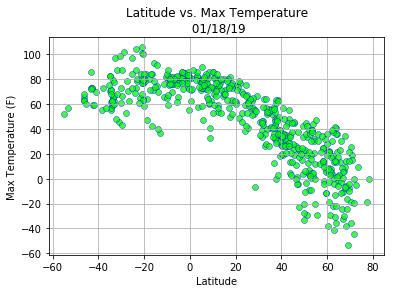

In [22]:
# * Temperature (F) vs. Latitude
plt.scatter(df.Latitude, df.Max_Temp, alpha = .75, c = "lime",
            edgecolor="blue", linewidths=.5)

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Latitude vs. Max Temperature\n {date}')
plt.grid(True)

#SAVE PLOT AS PNG
plt.savefig('temp.png')

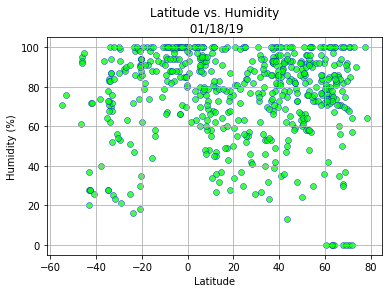

In [23]:
# * Humidity (%) vs. Latitude
plt.scatter(df.Latitude, df.Humidity, alpha = .75, c = "lime",
            edgecolor="blue", linewidths=.5)

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Latitude vs. Humidity\n {date}')
plt.grid(True)

#SAVE PLOT AS PNG
plt.savefig('humid.png')

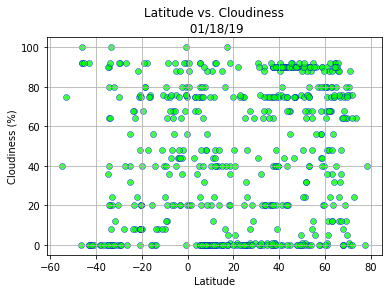

In [24]:
# * Cloudiness (%) vs. Latitude
plt.scatter(df.Latitude, df.Cloudiness, alpha = .75, c = "lime",
            edgecolor="blue", linewidths=.5)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Latitude vs. Cloudiness\n {date}')
plt.grid(True)

#SAVE PLOT AS PNG
plt.savefig('cloud.png')

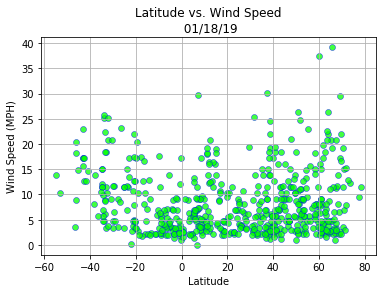

In [25]:
# * Wind Speed (mph) vs. Latitude
plt.scatter(df.Latitude, df.Wind_Speed, alpha = .75, c = "lime",
            edgecolor="blue", linewidths=.5)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title(f'Latitude vs. Wind Speed\n {date}')
plt.grid(True)

#SAVE PLOT AS PNG
plt.savefig('wind.png')

Three Observable Trends:

1 - Latitude/Max Temp

Similar distances from equator in hemispheres aren't comparable vs temp
Example -40 lat (southern) is warmer than 40 lat (northern)

2 - Latitude/Humidity

The vast majority of cities, regardless of latitude, have +60% humidity.

3 - Latitude/Cloudiness

There are distinct groupings of cloudiness, at 0%, 75%, and 90%.
However, the majority of these cities are in the northern hemisphere.

4 - Latitude/Windiness

The vast majority of cities, regardless of latitude, have between 2.5 - 10 mph wind